<a href="https://www.kaggle.com/code/emekaabadom/loan-prediction-eda-and-modelling?scriptVersionId=203135664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-dataset/Loan_Default.csv


    **LOAN PREDICTION MODELLING AND EDA**

**DATA DESCRIPTION**

Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. Can you overcome these factors & build a strong classifier to predict defaulters?

**Acknowledgements**:

This dataset has been referred from Kaggle.

In [2]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data into notebook
loan_data = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
loan_data.shape

(148670, 34)

# Data Analysis/Preprocessing

In [5]:
loan_data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# Statistical Analysis

In [7]:
loan_data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
print("Number of duplicate rows: ", len(loan_data[loan_data.duplicated()]))

Number of duplicate rows:  0


In [9]:
#Percentage of missing data in columns
Features_with_missing_values = [col for col in loan_data.columns if loan_data[col].isnull().sum() > 0]
for col in Features_with_missing_values:
    print(col,np.round(loan_data[col].isnull().mean(),2),'% missing values')

loan_limit 0.02 % missing values
approv_in_adv 0.01 % missing values
loan_purpose 0.0 % missing values
rate_of_interest 0.25 % missing values
Interest_rate_spread 0.25 % missing values
Upfront_charges 0.27 % missing values
term 0.0 % missing values
Neg_ammortization 0.0 % missing values
property_value 0.1 % missing values
income 0.06 % missing values
age 0.0 % missing values
submission_of_application 0.0 % missing values
LTV 0.1 % missing values
dtir1 0.16 % missing values


# Checking for numerical and Object features

In [10]:
def count_features(data):
    #Getting column with objects dtype
    objects= data.select_dtypes(include=['object']).columns
    numerical=data.select_dtypes(include=['int64']).columns
    floating=data.select_dtypes(include=['float64']).columns
    
    print('Numerical features are :',len(numerical))
    print('Objects features are  :',len(objects))
    print('Floating features are :',len(floating))

In [11]:
count_features(loan_data)

Numerical features are : 5
Objects features are  : 21
Floating features are : 8


In [12]:
# Checking count of Eligibility by gender
gender_status=loan_data.groupby(['Gender','Status']).size().reset_index().rename(columns={0:'Total Count'})
gender_status

,Gender,Status,Total Count
0,Female,0,20418
1,Female,1,6848
2,Joint,0,33466
3,Joint,1,7933
4,Male,0,31255
5,Male,1,11091
6,Sex Not Available,0,26892
7,Sex Not Available,1,10767


<Axes: xlabel='Gender', ylabel='Total Count'>

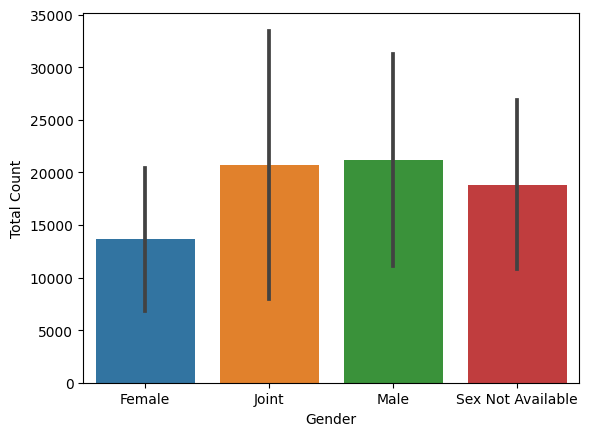

In [13]:
sns.barplot(x='Gender',y='Total Count',data=gender_status)

# Checking unique values in each Object feature

In [14]:
loan_data.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [15]:
def count_unique_values(data):
    objects = data.select_dtypes(include=['object']).columns
    for col in objects:
        unique = data[col].value_counts()
        print(unique, '\n')
        print('*'*50)
count_unique_values(loan_data)

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64 

**************************************************
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64 

**************************************************
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64 

**************************************************
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64 

**************************************************
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64 

**************************************************
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64 

**************************************************
open_credit
nopc    148114
opc        556
Name: count, dtype: int64 

**************************************************
business_or_commercial
nob/c    127908
b/c

# Checking for missing values

In [16]:
missing_features = [features for features in loan_data.columns if loan_data[features].isnull().sum() > 0]
print('Features having missings values are :',missing_features)

Features having missings values are : ['loan_limit', 'approv_in_adv', 'loan_purpose', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'property_value', 'income', 'age', 'submission_of_application', 'LTV', 'dtir1']


In [17]:
loan_data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

<BarContainer object of 4 artists>

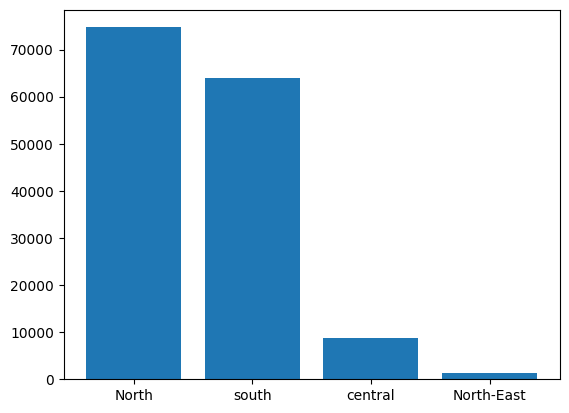

In [18]:
region_names=loan_data.Region.value_counts().index
region_val=loan_data.Region.value_counts().values
plt.bar(region_names, region_val)

# Feature engineering

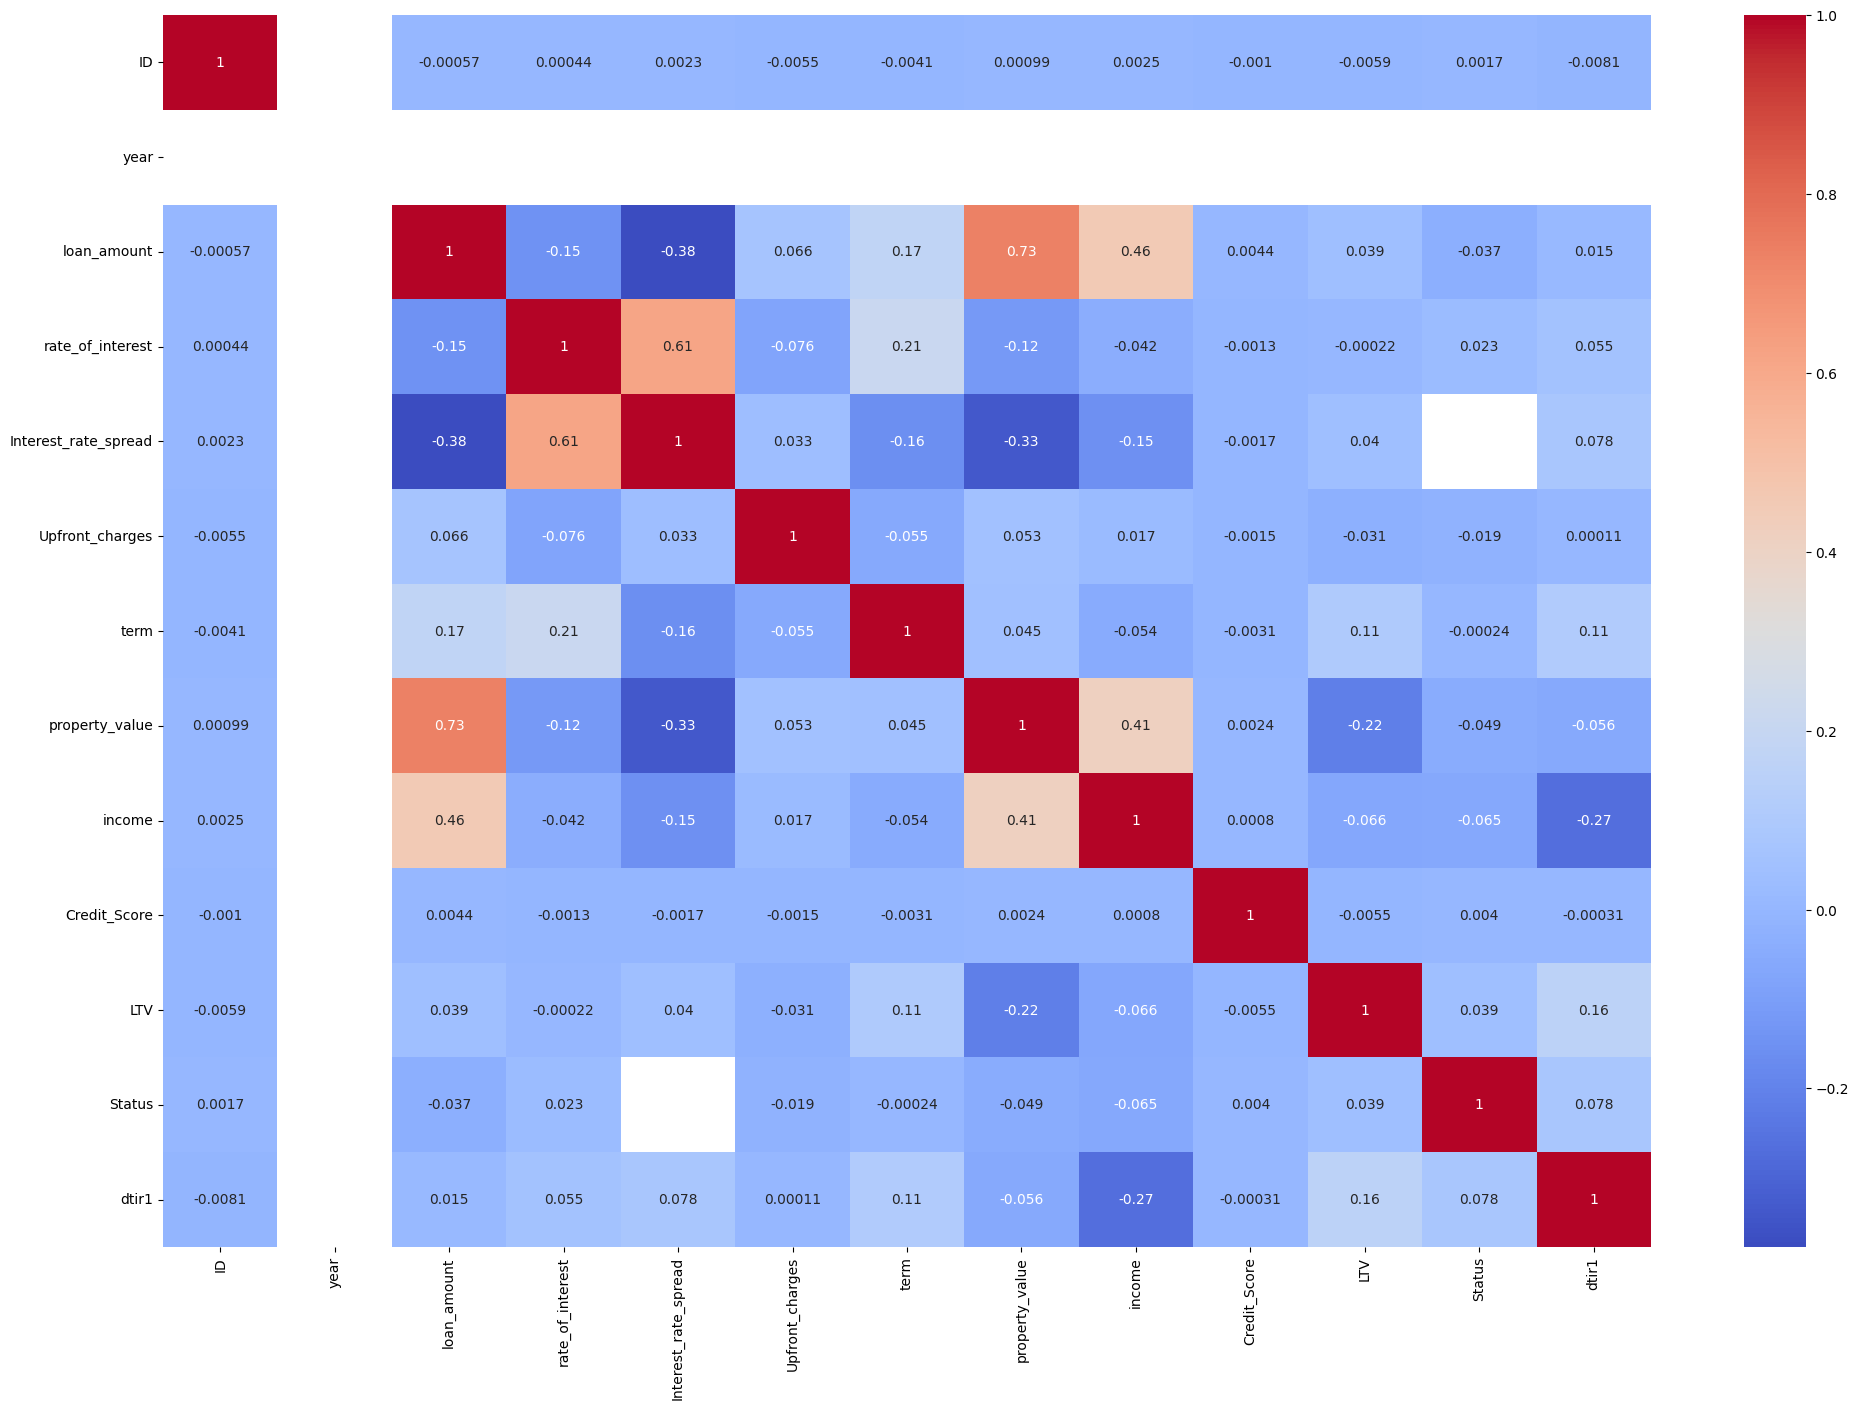

In [19]:
#  Get the data types of each column
column_types = loan_data.dtypes

# Select only the numeric columns
numeric_columns = loan_data.select_dtypes(include=[np.number])

# Create a correlation matrix for the numeric columns
c = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()


Following are independent features which are highly correlated, one should be dropped:
1. Relationship between Status and Rate of Interest
2. Loan amount and property type
3. Loan amount and term
4. Rate of interest and interest spread
5. Loan amount and Property value¶

# Removing Irrelevant columns

In [20]:
loan_data.drop(['ID','year','term','Interest_rate_spread','property_value','submission_of_application'],axis=1,inplace=True)

# Detecting and removing Outliers

In [21]:
def detect_outliers(data):
    threshold = 3
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            mean = np.mean(data[i])
            std = np.std(data[i])
            z_scores = [(y - mean) / std for y in data[column]]
            data = data[np.abs(z_scores) <= threshold]
        return data
loan_data = detect_outliers(loan_data)
loan_data

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.0


# Inputing mull/NaN values

In [22]:
for i in loan_data.columns:       
    if loan_data[i].dtype=='float64' or loan_data[i].dtype=='int64':
        loan_data[i].fillna(loan_data[i].mean(),inplace=True)

    else:
        loan_data[i].fillna(loan_data[i].mode()[0],inplace=True)
        
loan_data

/tmp/ipykernel_17/2897905577.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[i].fillna(loan_data[i].mode()[0],inplace=True)
/tmp/ipykernel_17/2897905577.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,...,1740.0,EXP,758,CIB,25-34,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,...,4980.0,EQUI,552,EXP,55-64,72.746457,North,direct,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,...,9480.0,EXP,834,CIB,35-44,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,...,11880.0,EXP,587,CIB,45-54,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,...,10440.0,CRIF,602,EXP,25-34,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,...,7860.0,CIB,659,EXP,55-64,71.792763,south,direct,0,48.000000
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,...,7140.0,CIB,569,CIB,25-34,74.428934,south,direct,0,15.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,...,6900.0,CIB,702,EXP,45-54,61.332418,North,direct,0,49.000000
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,...,7140.0,EXP,737,EXP,55-64,70.683453,North,direct,0,29.000000


In [23]:
loan_data.isnull().sum()

loan_limit                  0
Gender                      0
approv_in_adv               0
loan_type                   0
loan_purpose                0
Credit_Worthiness           0
open_credit                 0
business_or_commercial      0
loan_amount                 0
rate_of_interest            0
Upfront_charges             0
Neg_ammortization           0
interest_only               0
lump_sum_payment            0
construction_type           0
occupancy_type              0
Secured_by                  0
total_units                 0
income                      0
credit_type                 0
Credit_Score                0
co-applicant_credit_type    0
age                         0
LTV                         0
Region                      0
Security_Type               0
Status                      0
dtir1                       0
dtype: int64

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>,
        <Axes: title={'center': 'Upfront_charges'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'LTV'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'dtir1'}>, <Axes: >]], dtype=object)

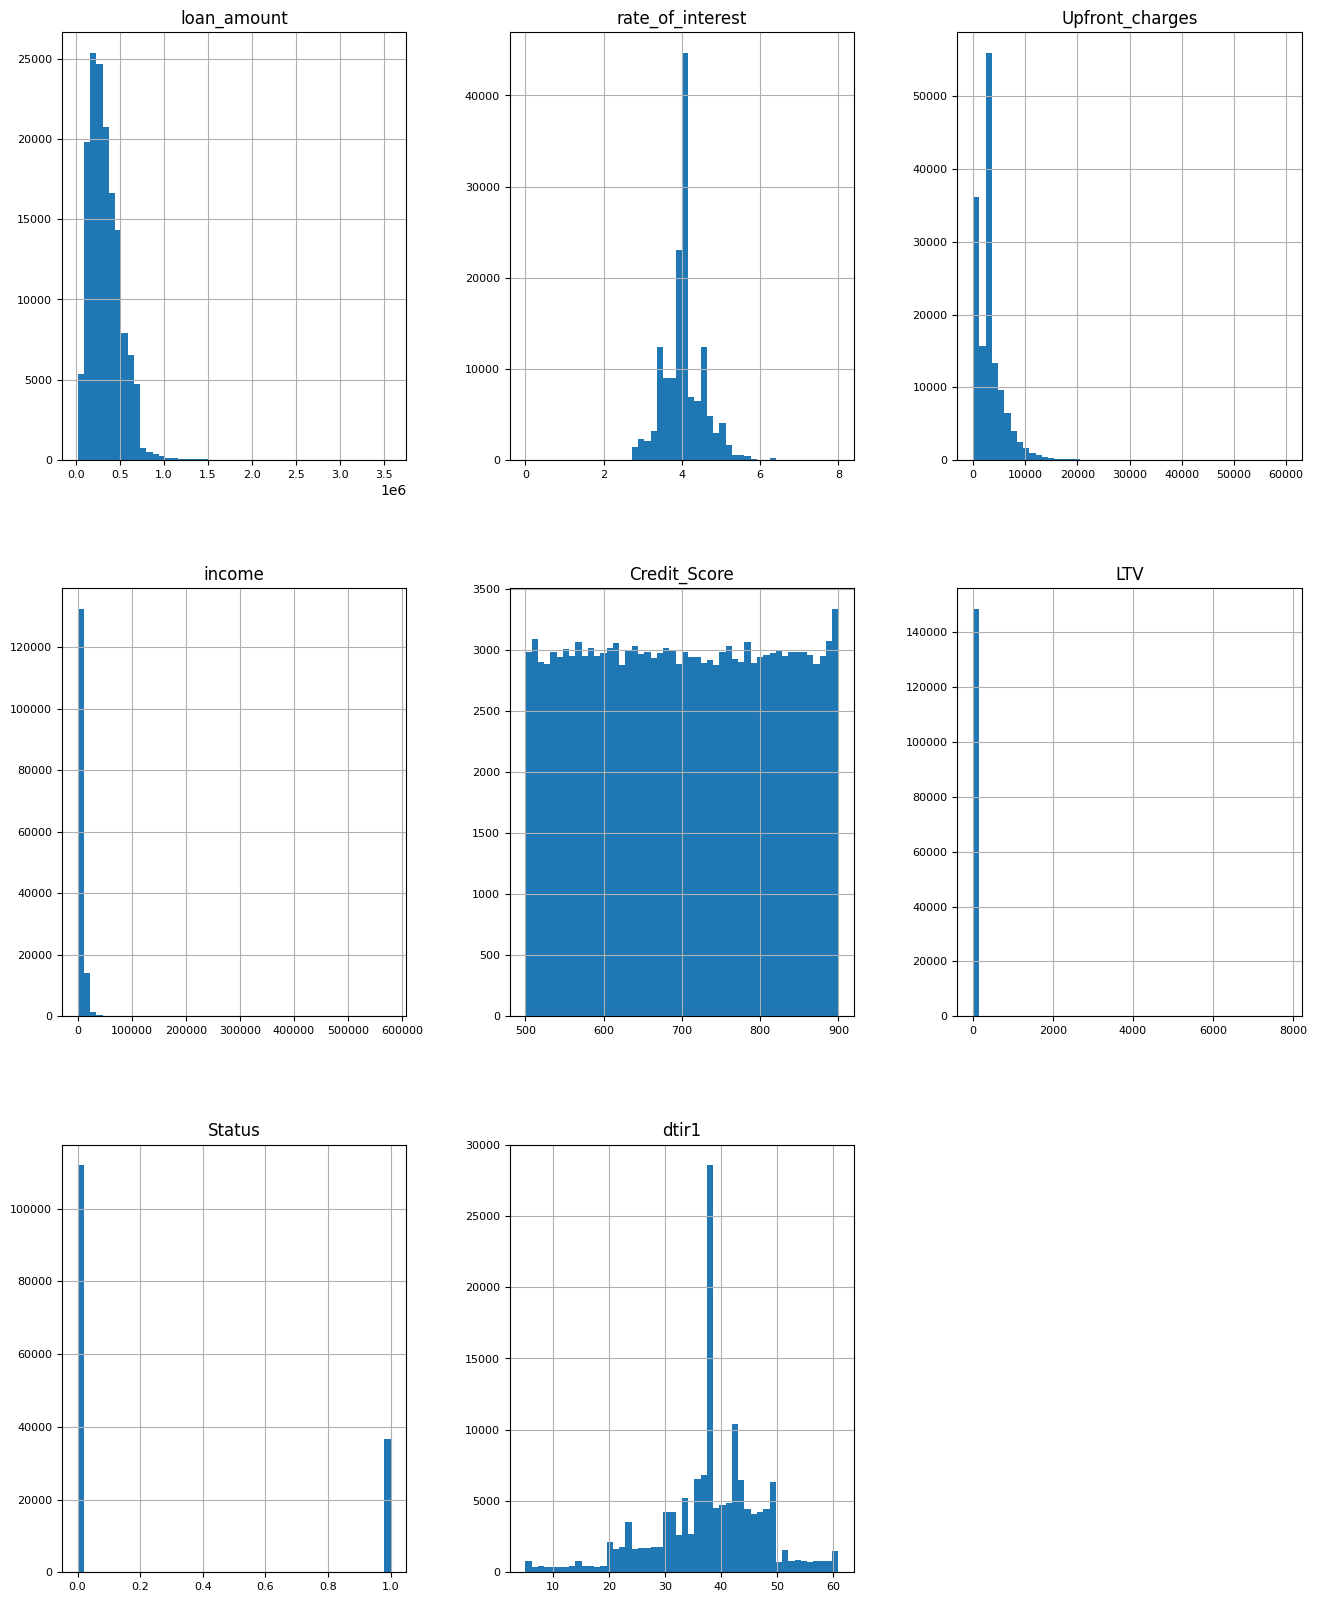

In [24]:
loan_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [25]:
loan_data.to_csv('Preprocessed Data.csv')

# Handling Categorical values

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical_cols =loan_data.select_dtypes(include=['object']).columns
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
loan_data[categorical_cols] = loan_data[categorical_cols].apply(lambda col: le.fit_transform(col))

# Splitting data into Train and Test sets¶

In [27]:
#setting target attribute 'Status'
X=loan_data.drop('Status',axis='columns')
Y=loan_data.Status

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=True)

In [29]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Get the probability predictions for ROC AUC (only for applicable models)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = np.zeros(len(y_test))
    
    # Evaluate the model using several metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if np.any(y_pred_proba) else None
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }


In [30]:
def run_classification_models(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(probability=True)  # Enable probability for SVM
    }
    
    # Dictionary to store results for each model
    results = {}
    
    # Iterate through each model and evaluate it
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model_results = evaluate_model(model, X_train, y_train, X_test, y_test)
        results[model_name] = model_results
    
    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results).T
    print("\nModel Comparison:")
    print(results_df)
    
    return results_df

In [31]:
run_classification_models(X_train, y_train, X_test, y_test)

Training Logistic Regression...


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training K-Nearest Neighbors...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...

Model Comparison:
                        Accuracy  Precision    Recall  F1-Score   ROC AUC
Logistic Regression     0.754994   0.000000  0.000000  0.000000  0.567047
K-Nearest Neighbors     0.926650   0.793468  0.947152  0.863525  0.964403
Decision Tree           0.999630   0.999040  0.999451  0.999245  0.999570
Random Forest           0.999933   1.000000  0.999725  0.999863  1.000000
Support Vector Machine  0.755028   0.508475  0.004118  0.008170  0.579595


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.754994,0.000000,0.000000,0.000000,0.567047
K-Nearest Neighbors,0.926650,0.793468,0.947152,0.863525,0.964403
Decision Tree,0.999630,0.999040,0.999451,0.999245,0.999570
Random Forest,0.999933,1.000000,0.999725,0.999863,1.000000
Support Vector Machine,0.755028,0.508475,0.004118,0.008170,0.579595
